In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df = pd.read_json('../data/database-27-10.json')

In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
df = df.loc[(df['date'] >= "2022-07-16") & (df['date'] <= "2022-10-27")]

#### Fülle alle NaN Werte aus `rankings` mit einem leeren Array

In [37]:
df['rankings'].fillna("[]")

KeyError: 'rankings'

#### Füge ein neues Feature hinzu: Themengebiet

In [ ]:
topics = json.loads(open("topics/topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

#### Füge vier neue Features hinzu: Tag, Woche, Monat, Jahr

In [ ]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

#### Füge ein neues Feature hinzu: Ranking besser als 5. Platz

In [ ]:
def high_ranking(x):
    if (type(x) == list):
        return any(ranking['score'] <= 5 for ranking in x)
    return False

df['high_ranking'] = df['rankings'].apply(high_ranking)

#### Filter die Artikel nach: Hohes Ranking vorhanden

In [ ]:
df = df.loc[df.high_ranking]

In [ ]:
df_year = df.groupby(["week", "year"]).size().reset_index(name="amount")

KeyError: 'week'

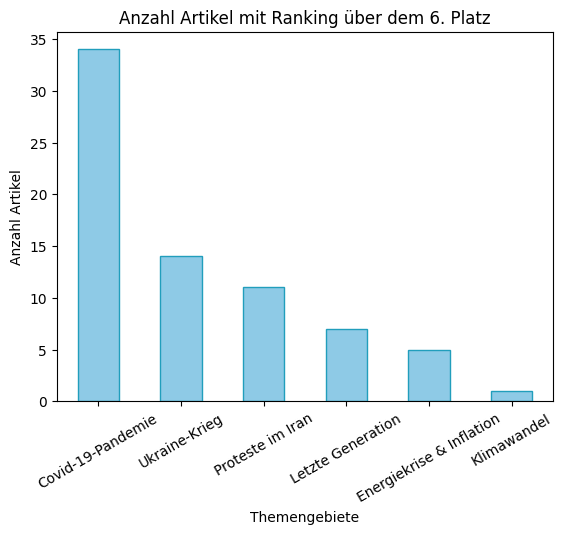

In [ ]:
plt.style.use('default') # 'default' or 'dark_background'

fig, ax = plt.subplots()

ax = df_year.plot(kind="line", x="date", y="amount", ax=ax, xlabel="Zeit in Monatsabschnitten", figsize=(7,5), ylabel="Anzahl Artikel", legend=False)

ax.set_title(f'Entwicklung Ranking (Themengebiet: Covid-19-Pandemie)', pad=20)

fig.savefig(f'figures/line-ranking-trend-topic.png')